# (Ch1しかGetしてなかった)
## Remark
## インプットファイルの要件
- 元データのCSVが時系列順で並んでいる。
  - Pedestal-1,Reference,Pedestal0 の後に ファイバーペア1＆2,2＆3,3&4,,,9&10について
  - Pedestal1
  - LED1PD1
  - Pedestal2
  - LED2PD2
  - Pedestal3
  - LED2PD1
  - Pedestal4
  - LED1PD2
  - Pedestal5
- ch1のファイバー番号の方がch2のファイバー番号より若い

0
['118dC12h', '2023-12-19-215846', '2023-12-20-191008']


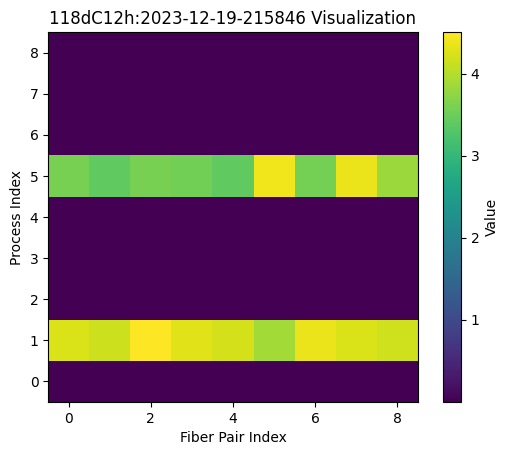

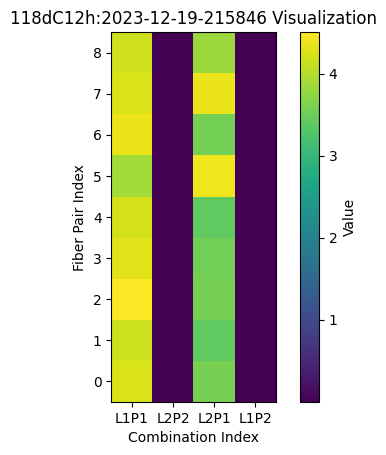

/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/2mFiberAnalysis/outputPedestalSubtraction4XtalkCheck/118dC12h/outputPedestalSubtraction4XtalkCheck2023-12-19-215846_ch1.csv
/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/2mFiberAnalysis/outputPedestalSubtraction4XtalkCheck/118dC12h/outputPedestalSubtraction4XtalkCheck2023-12-19-215846_ch2.csv


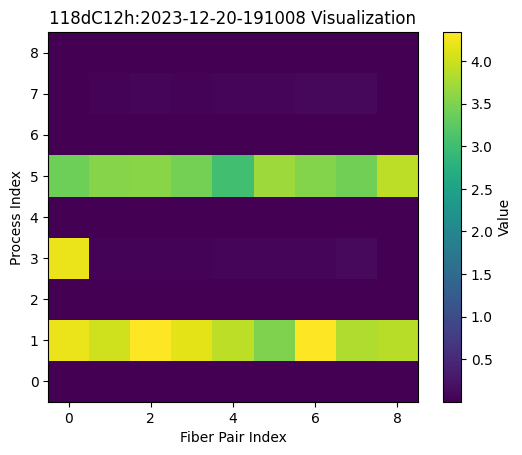

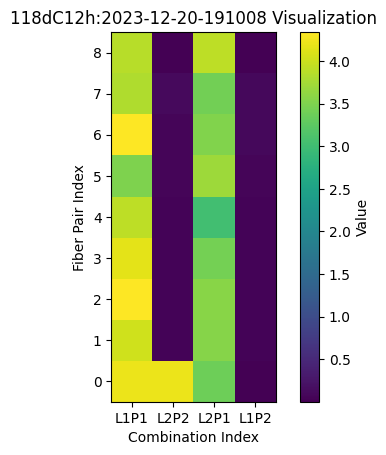

/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/2mFiberAnalysis/outputPedestalSubtraction4XtalkCheck/118dC12h/outputPedestalSubtraction4XtalkCheck2023-12-20-191008_ch1.csv
/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/2mFiberAnalysis/outputPedestalSubtraction4XtalkCheck/118dC12h/outputPedestalSubtraction4XtalkCheck2023-12-20-191008_ch2.csv


In [21]:
# csvファイルの各列で平均をとり、1次元配列を作る。
# 1次元配列から9×9の2次元配列をch1とch2でそれぞれ作成。
# ヘッダは[Pedestal1, LED1PD1, Pedestal2, LED2PD2, Pedestal3, LED2PD1, Pedestal4, LED1PD2, Pedestal5]\
#       |Pedestal1|LED1PD1|Pedestal2|LED2PD2|Pedestal3|LED2PD1|Pedestal4|LED1PD2|Pedestal5|
# |1&2|
# |2&3|
# ・・・
# |9&10|
# 2n+1列目から2n列目と2n+2列目の平均を引く。(n=0,1,2,3)
# その値を新しいリストに詰める。
import glob as glob
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import csv

nchannel =2
groupSize =3
nCombination =4
nPairs =9
visualizationFlag = True

datasets = [# condition, before, after]
	#['137dC10min','2023-11-07-215833','2023-11-08-124310']
	#,['150dC3min','2023-11-02-191329','2023-11-03-144727','2023-11-03-200225','2023-11-03-221341']
	['118dC12h','2023-12-19-215846','2023-12-20-191008']
]



#*******************************************
for iParameter, listRuns in enumerate(datasets):
	print(iParameter)
	parameterLabel = listRuns[0]
	runDates = listRuns[1:]
	nMeasureSample = len(runDates) # [before ,after]
	print(listRuns)

	for irun,date in enumerate(runDates):
		outFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/2mFiberAnalysis/outputPedestalSubtraction4XtalkCheck/{parameterLabel}/outputPedestalSubtraction4XtalkCheck{date}.csv'
		rawDataFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/logger_data/{date}/*csv'
		csv_files = sorted(glob.glob(rawDataFilePath))
		csvMeans1 = np.empty(0)
		csvMeans2 = np.empty(0)

		nFiles =0
		for file in csv_files:
			nFiles +=1
			mydf = pd.read_csv(file
												,encoding="Shift-JIS"
												,skiprows=22)
			
			mean_ch1,mean_ch2 = mydf.iloc[:,3:5].mean(numeric_only=True)
			#print([mean_ch1,mean_ch2])
			#0		1			2		3		4		5		6		7			8	
			#No.	time	ms	ch1	ch2	ch3	ch4	Alarm	AlarmOut
			csvMeans1 = np.append(csvMeans1,mean_ch1)
			csvMeans2 = np.append(csvMeans2,mean_ch2)
		
		csvMeans1=csvMeans1.reshape(nPairs,-1).T
		csvMeans2=csvMeans2.reshape(nPairs,-1).T
		if(visualizationFlag == True):
			# ********** Visualization **********
			plt.imshow(csvMeans1, cmap='viridis', interpolation='nearest', origin='lower')
			#plt.imshow(csvMeans2, cmap='viridis', interpolation='nearest', origin='lower')
			plt.colorbar(label='Value')
			plt.xlabel('Fiber Pair Index')
			plt.ylabel('Process Index')
			plt.title(f'{parameterLabel}:{date} Visualization')
			plt.show()
			# ************************************

		dataSubtracted1 = np.empty((0,nPairs),dtype=float)
		dataSubtracted2 = np.empty((0,nPairs),dtype=float)
		for	i in range(nCombination):
			dataSubtracted1 = np.vstack([dataSubtracted1,csvMeans1[2*i+1] - (csvMeans1[2*i] + csvMeans1[2*i+2])/2])
			dataSubtracted2 = np.vstack([dataSubtracted2,csvMeans2[2*i+1] - (csvMeans2[2*i] + csvMeans2[2*i+2])/2])
		
		dataSubtracted1 = dataSubtracted1.T
		dataSubtracted2 = dataSubtracted2.T
		if(visualizationFlag == True):
		# ********** Visualization **********
			plt.imshow(dataSubtracted1, cmap='viridis', interpolation='nearest', origin='lower')
			#plt.imshow(dataSubtracted2, cmap='viridis', interpolation='nearest', origin='lower')
			plt.colorbar(label='Value')
			plt.xticks(np.arange(4), ['L1P1', 'L2P2', 'L2P1', 'L1P2'])
			plt.xlabel('Combination Index')
			plt.ylabel('Fiber Pair Index')
			plt.title(f'{parameterLabel}:{date} Visualization')
			plt.show()
		# ************************************

		df1 = pd.DataFrame(dataSubtracted1,columns=['L1P1','L2P2','L2P1','L1P2'])
		df2 = pd.DataFrame(dataSubtracted2,columns=['L1P1','L2P2','L2P1','L1P2'])
		#print(df1)
		#print(df2)
		outFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/2mFiberAnalysis/outputPedestalSubtraction4XtalkCheck/{parameterLabel}/outputPedestalSubtraction4XtalkCheck{date}_ch1.csv'
		print(outFilePath)
		df1.to_csv(f'{outFilePath}',index=False)
		outFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/2mFiberAnalysis/outputPedestalSubtraction4XtalkCheck/{parameterLabel}/outputPedestalSubtraction4XtalkCheck{date}_ch2.csv'
		print(outFilePath)
		df2.to_csv(f'{outFilePath}',index=False)


		# ループの回数（n）を決定
		#n = data_2dim.shape[0] // nGroupSize
		#print("# of iteration= ",n)
		#outputdata = np.empty(0)
		

#outFilePath = f'./outputPedestalSubtraction4XtalkCheck/{parameterLabel}/outputPedestalSubtraction4XtalkCheck_{runTime}.csv'

In [1]:
# make 1D array from csv
data_1dim_ch1 = np.empty(0)
data_1dim_ch2 = np.empty(0)

for file in csv_files:
    mydf = pd.read_csv(file,
                           names=['No.', 'time', 'ms', 'Ch1 [V]', 'Ch2 [V]', 'Ch3 [V]', 'Ch4 [V]', 'Alarm [V]', 'AlarmOut [V]'],
                           usecols=[ 'Ch1 [V]', 'Ch2 [V]' ],
                           encoding="Shift-JIS", 
                           skiprows=21)
    
    mean_ch1: float =0
    mean_ch2: float =0
    mean_ch1 = mydf['Ch1 [V]'].mean(numeric_only=True)
    mean_ch2 = mydf['Ch2 [V]'].mean(numeric_only=True)
    #print(file)
    #print("mean_ch1=",mean_ch1)
    #print("mean_ch2=",mean_ch2)

    data_1dim_ch1 = np.append(data_1dim_ch1,mean_ch1)
    data_1dim_ch2 = np.append(data_1dim_ch2,mean_ch2)
#reshape 

nrows_ch1 = len(data_1dim_ch1) // 9
nrows_ch2 = len(data_1dim_ch2) // 9
data_2dim_ch1 = data_1dim_ch1.reshape(nrows_ch1,9)
data_2dim_ch2 = data_1dim_ch2.reshape(nrows_ch2,9)
print("data_2dim_ch1=","\n","|Pedestal1|LED1PD1|Pedestal2|LED2PD2|Pedestal3|LED2PD1|Pedestal4|LED1PD2|Pedestal5|","\n",data_2dim_ch1)
print("data_2dim_ch2=","\n","|Pedestal1|LED1PD1|Pedestal2|LED2PD2|Pedestal3|LED2PD1|Pedestal4|LED1PD2|Pedestal5|","\n",data_2dim_ch2)


NameError: name 'np' is not defined

In [13]:
# 転置して行の引き算を行う
outputdata_1d = np.empty(0)
outputdata = np.empty(0)
for data_2dim in data_2dim_ch1,data_2dim_ch2:
    data_2dim_T = data_2dim.transpose()
    #print(data_2dim_T)
    #2n+1列目から2n列目と2n+2列目の平均を引く。(n=0,1,2,3)
    #|Pedestal1|LED1PD1|Pedestal2|LED2PD2|Pedestal3|LED2PD1|Pedestal4|LED1PD2|Pedestal5|
    for n in range (0,4):
        signal = data_2dim_T[2*n+1] - (data_2dim_T[2*n] + data_2dim_T[2*n+2])/2
        outputdata_1d = np.append(outputdata_1d,signal)
outputdata = (outputdata_1d.reshape(8,9)).T
output_ch1 = (np.hsplit(outputdata,2))[0]
output_ch2 = (np.hsplit(outputdata,2))[1]

# outputdataは行がファイバーのペア、列が ch1[L1P1,L2P2,L2P1,L1P2]ch2[L1P1,L2P2,L2P1,L1P2]
print(outputdata)
print(output_ch1)
print(output_ch2)
        

[[3.71718235 0.03060353 4.37196353 0.02763091 0.02940471 4.52701647
  0.03208235 3.77602   ]
 [3.75101515 0.01953176 3.68683176 0.01867059 0.02155333 3.91826588
  0.02232588 3.92768941]
 [3.23515059 0.01517176 3.37798471 0.01188471 0.01381059 3.56740941
  0.01829059 3.42511059]
 [3.15788941 0.01082732 3.54924261 0.01226    0.01570706 3.88485902
  0.01350961 3.39296   ]
 [3.35036    0.0082297  4.10364118 0.01098353 0.0126     4.33906121
  0.00992824 3.54801059]
 [3.97901176 0.0139     3.98994    0.01102    0.01341294 4.19438
  0.01567882 4.15328   ]
 [3.68738588 0.01354    3.66366    0.01338    0.01699059 4.00488
  0.0157     3.91898   ]
 [3.21473529 0.01099176 3.14458941 0.01609412 0.01814706 3.27491647
  0.01445647 3.52662   ]
 [2.96875372 0.01176    0.0119     2.97546    0.02098775 3.27324
  3.27504    0.02048   ]]
[[3.71718235 0.03060353 4.37196353 0.02763091]
 [3.75101515 0.01953176 3.68683176 0.01867059]
 [3.23515059 0.01517176 3.37798471 0.01188471]
 [3.15788941 0.01082732 3.5492

In [14]:
# X talk の計算
#xtalk_1to2 = 
#xtalk_2to1 = 

In [9]:
# ファイバーのロスの計算(とりあえずch1)
#データフレームからCSVに書き出す。
df_ch1 = pd.DataFrame(output_ch1,
    columns=['L1P1 [V]', 'L2P2 [V]', 'L2P1 [V]', 'L1P2 [V]'],
    index=['1,2', '2,3', '3,4', '4,5', '5,6', '6,7', '7,8', '8,9', '9,10'])
df_ch1.to_csv(outFilePath, index=True)